# <center> $\underline{\textbf{AAG04 - Comparações Experimentais}}$ <p><center> Flávio Motta

## $\textbf{1. Contexto}$

<p>É possível comparar desempenho de alunos em determinada prova em anos diferentes, dessa forma pode-se entender que os alunos podem ter melhorado/piorado o nível de estudo, ou que a prova pode ter ficado mais fácil/difícil
<p>Tanto no ano de 2011 quanto no ano de 2019 foram realizado o exame nacional do POSCOMP, com os seguintes dados:
    
|Característica| 2011 | 2019
| --- | --- | --- |
| \begin{equation} \mu \end{equation} | 24 | 28.67
| \begin{equation} \sigma \end{equation} | 7.1 | 8.35
| \begin{equation} N \end{equation} | 29 | 29

<p> Supondo que tenha-se uma distribuição normal das notas em ambos anos, pode-se gerar a seguinte distribuição:


## $\textbf{2. Código}$

### 2.1. Importando as bibliotecas necessarias

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

### 2.1. Declaração de variáveis importantes

In [40]:
mu2011, sigma2011, mu2019, sigma2019, n = 24, 7.1, 28.67, 8.35, 29

### 2.2. Gerando uma distribuição normal (p-value acima de 0.8 no teste de Kolmogorov) para o ano de 2011

In [41]:
ehNormal = False
while(ehNormal == False): #Repetição para encontrar uma distribuição que atenda uma distribuição normal no teste de Kolmogorov (p-value pelo menos 0.8)
    s = np.random.normal(mu2011, sigma2011, n) #Gera a distribuição aleatoria com os dados
    dist2011 = s.astype(int) #Converte o vetor para inteiros
    d = stats.kstest(dist2011, 'norm', args=(mu2011, sigma2011))#Realiza o teste de Kolmogorov
    if d[1] > 0.8:
        ehNormal = True #Dessa forma a distribuição "passou" no teste de normalidade
print('p-value calculado através do teste de Kolmogorov da distribuição de 2011: ',d[1]) #p-value da distribuicao criada para 2011

p-value calculado através do teste de Kolmogorov da distribuição de 2011:  0.9196302543488407


### 2.3. Gerando uma distribuição normal (p-value acima de 0.8 no teste de Kolmogorov) para o ano de 2019

In [42]:
ehNormal = False
while(ehNormal == False): #Repetição para encontrar uma distribuição que atenda uma distribuição normal no teste de Kolmogorov (p-value pelo menos 0.8)
    s = np.random.normal(mu2019, sigma2019, n) #Gera a distribuição aleatoria com os dados
    dist2019 = s.astype(int) #Converte o vetor para inteiros
    d = stats.kstest(dist2019, 'norm', args=(mu2019, sigma2019))#Realiza o teste de Kolmogorov
    if d[1] > 0.8:
        ehNormal = True #Dessa forma a distribuição "passou" no teste de normalidade
print('p-value calculado através do teste de Kolmogorov da distribuição de 2019: ',d[1]) #p-value da distribuicao criada para 2019

p-value calculado através do teste de Kolmogorov da distribuição de 2019:  0.9896430144527493


### 2.4. Gerando um histograma para ter um "feedback" visual do que foi gerado

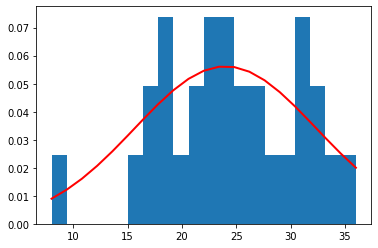

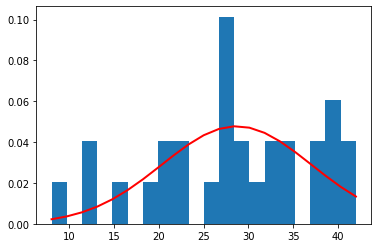

In [43]:
#2011
count, bins, ignored = plt.hist(dist2011, 20, density=True) #tentei visualizar a melhor forma de definir os bins
plt.plot(bins, 1/(sigma2011 * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu2011)**2 / (2 * sigma2019**2) ),
linewidth=2, color='r')
plt.show()
#2019
count, bins, ignored = plt.hist(dist2019, 20, density=True)
plt.plot(bins, 1/(sigma2019 * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu2019)**2 / (2 * sigma2019**2) ),
linewidth=2, color='r')
plt.show()

### 2.5. Verificando teste t

In [44]:
t,p = stats.ttest_ind(dist2011,dist2019)
print('t: ',t,"\np: ",p)

t:  -1.9056951288519586 
p:  0.06182797116507962


Para o teste t, tivemos o valor de p relativamente baixo (6%), indicando que a chance da diferença ser ao acaso é relativamente baixa.

### 2.6 Calculos de intervalo de confiança
#### 2.6.1 Calculo de limite inferior e superior de ambas amostras com nível de confiança em 90%

In [46]:
intervalo = 0.9
t = stats.t.ppf((intervalo+1)/2,29)
limiteInferior2011 = mu2011 - t * sigma2011 / math.sqrt(n)
limiteSuperior2011 = mu2011 + t * sigma2011 / math.sqrt(n)
limiteInferior2019 = mu2019 - t * sigma2019 / math.sqrt(n)
limiteSuperior2019 = mu2019 + t * sigma2019 / math.sqrt(n)
print(limiteInferior2011)
print(limiteSuperior2011)
print(limiteInferior2019)
print(limiteSuperior2019)

21.759808228634867
26.240191771365133
26.035408268887483
31.30459173111252


Para essa distribuição gerada, com um intervalo de confiança em 90% os limites superior de 2011 e o inferior de 2019 já estão em um mesmo intervalo. Dessa forma como a média de um não está contida no intervalo de outro, lembrando que a média de 2011 é 24 e de 2019 é 28.67, o teste-t faz-se necessário para tirar conclusões.

#### 2.6.2 Calculo de limite inferior e superior de ambas amostras com nível de confiança em 95%

In [50]:
intervalo = 0.95
t = stats.t.ppf((intervalo+1)/2,29)
limiteInferior2011 = mu2011 - t * sigma2011 / math.sqrt(n)
limiteSuperior2011 = mu2011 + t * sigma2011 / math.sqrt(n)
limiteInferior2019 = mu2019 - t * sigma2019 / math.sqrt(n)
limiteSuperior2019 = mu2019 + t * sigma2019 / math.sqrt(n)
print(limiteInferior2011)
print(limiteSuperior2011)
print(limiteInferior2019)
print(limiteSuperior2019)

21.303493768676503
26.696506231323497
25.49875675611955
31.841243243880452


Ao aumentar o intervalo de confiança para 95% continuamos observando o mesmo comportamento, os limites superior de 2011 e o inferior de 2019 se sobrepõe. Porém ambos IC não contém a média do outro, dessa forma o teste-t precisa ser realizado para afirmar a hipótese.

#### 2.6.3 Calculo de limite inferior e superior de ambas amostras com nível de confiança em 99%

In [51]:
intervalo = 0.99
t = stats.t.ppf((intervalo+1)/2,29)
limiteInferior2011 = mu2011 - t * sigma2011 / math.sqrt(n)
limiteSuperior2011 = mu2011 + t * sigma2011 / math.sqrt(n)
limiteInferior2019 = mu2019 - t * sigma2019 / math.sqrt(n)
limiteSuperior2019 = mu2019 + t * sigma2019 / math.sqrt(n)
print(limiteInferior2011)
print(limiteSuperior2011)
print(limiteInferior2019)
print(limiteSuperior2019)

20.365879111047498
27.634120888952502
24.396069095386846
32.943930904613154


Quando colocamos um intervalo de confiança em 99%, tem-se a mesma conclusão de que com 95%, ou seja, o teste T deve ser feito para melhores conclusões, pois mais uma vez a média de um não está contida no intervalo de outro.

#### 2.6.4 Calculo de limite inferior e superior de ambas amostras com nível de confiança em 99.9% (curiosidade)

In [52]:
intervalo = 0.999
t = stats.t.ppf((intervalo+1)/2,29)
limiteInferior2011 = mu2011 - t * sigma2011 / math.sqrt(n)
limiteSuperior2011 = mu2011 + t * sigma2011 / math.sqrt(n)
limiteInferior2019 = mu2019 - t * sigma2019 / math.sqrt(n)
limiteSuperior2019 = mu2019 + t * sigma2019 / math.sqrt(n)
print(limiteInferior2011)
print(limiteSuperior2011)
print(limiteInferior2019)
print(limiteSuperior2019)

19.17530538650356
28.82469461349644
22.995887320747144
34.34411267925286


A título de curiosidade, consegui mostrar por intervalo de confiança que as amostras não são diferentes nesse nível apenas com um intervalo de confiança de 99.9%

## $\textbf{3. Conclusão}$
<p>Primeiramente foi possível criar duas amostras normais (com p-value acima de 0.8 no teste de Kolmogorov), uma utilizando os dados do POSCOMP 2011 e outra para os dados do POSCOMP 2019.
<p>Com as amostras geradas foi possível realizar diversos testes, quando verificamos o intervalo de confiança, podemos perceber que apenas com um nível alto (99.9%) foi possível afimar que as amostras não são diferentes.
<p>Para os demais intervalos testados, foi necessário realizar o teste t.
<p>Utilizando o teste t podemos verificar que há apenas 6% de chance da diferença das amostras ser ao acaso.
<p>Diante do trabalho realizado, pode-se perceber primeiramente que as amostras são relativamente pequenas, o que dificulta um pouco a comparação. Diante da sequencia de testes podemos confiar no teste t que mostra a baixa probabilidade de a diferença das amostras ser ao acaso.